Summary Statistics for All Features:
                 count      mean       std      min      25%       50%       75%        max    skew   kurtosis
MedInc         20640.0     3.871     1.900    0.500    2.563     3.535     4.743     15.000   1.647      4.953
HouseAge       20640.0    28.639    12.586    1.000   18.000    29.000    37.000     52.000   0.060     -0.801
AveRooms       20640.0     5.429     2.474    0.846    4.441     5.229     6.052    141.909  20.698    879.353
AveBedrms      20640.0     1.097     0.474    0.333    1.006     1.049     1.100     34.067  31.317   1636.712
Population     20640.0  1425.477  1132.462    3.000  787.000  1166.000  1725.000  35682.000   4.936     73.553
AveOccup       20640.0     3.071    10.386    0.692    2.430     2.818     3.282   1243.333  97.640  10651.011
Latitude       20640.0    35.632     2.136   32.540   33.930    34.260    37.710     41.950   0.466     -1.118
Longitude      20640.0  -119.570     2.004 -124.350 -121.800  -118.490  -11

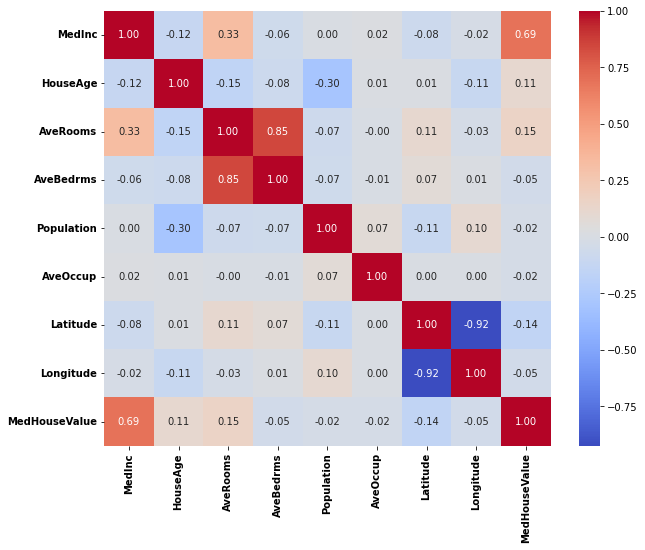

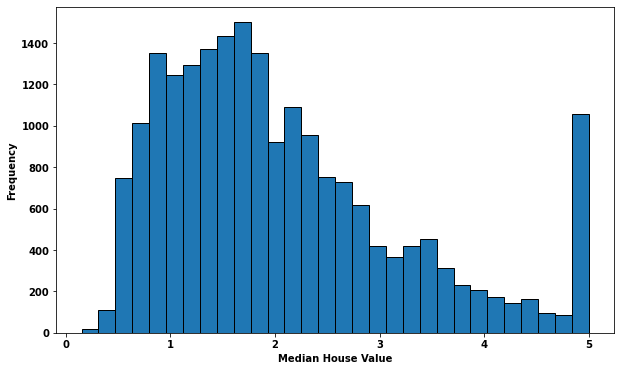


Mutual Information Scores:
Longitude     0.399609
MedInc        0.387196
Latitude      0.369610
AveRooms      0.102684
AveOccup      0.072366
HouseAge      0.029920
AveBedrms     0.024210
Population    0.020880
dtype: float64


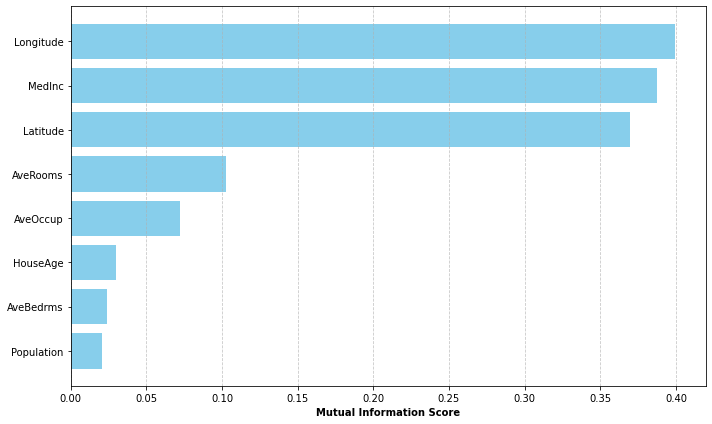


Top 3 important features based on mutual information:
['Longitude', 'MedInc', 'Latitude']


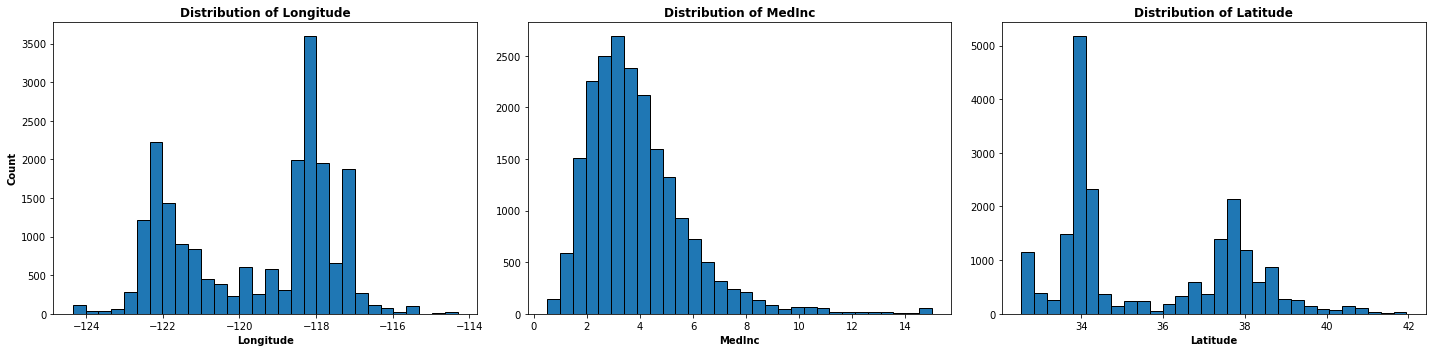

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression

def load_and_prepare_data():
    housing = fetch_california_housing()
    X = pd.DataFrame(housing.data, columns=housing.feature_names)
    y = pd.Series(housing.target, name='MedHouseValue')
    return pd.concat([X, y], axis=1)

def create_summary_table(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary.round(3)

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title("Correlation Heatmap", fontweight='bold')
    plt.gcf().set_facecolor('white')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.savefig('housing_corr.png')
    plt.show()

def plot_histogram(data, title, xlabel, ylabel="Frequency"):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, edgecolor='black')
    # plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.savefig('housing_target_univeriate_analysis.png')
    plt.show()

def calculate_mutual_info(X, y):
    mi_scores = mutual_info_regression(X, y)
    return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

def plot_mutual_info(mi_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(mi_scores.index, mi_scores.values, color='skyblue')
    plt.xlabel('Mutual Information Score', fontweight='bold')
    # plt.title('Mutual Information Regression Scores for Features', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.savefig('housing_mutual_info_regression_scores.png')
    plt.show()

def plot_top_features(df, features):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    # fig.suptitle("Distribution of Top 3 Important Features", fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature], bins=30, edgecolor='black')
        axes[i].set_title(f"Distribution of {feature}", fontweight='bold')
        axes[i].set_xlabel(feature, fontweight='bold')
        axes[0].set_ylabel("Count", fontweight='bold')
    
    plt.tight_layout()
    # plt.savefig('housing_top3.png')
    plt.show()

def main():
    df = load_and_prepare_data()
    
    summary_table = create_summary_table(df)
    print("Summary Statistics for All Features:")
    print(summary_table.to_string())
    
    plot_correlation_heatmap(df)
    plot_histogram(df['MedHouseValue'], "Distribution of Median House Value", "Median House Value")
    
    X = df.drop('MedHouseValue', axis=1)
    y = df['MedHouseValue']
    mi_scores = calculate_mutual_info(X, y)
    print("\nMutual Information Scores:")
    print(mi_scores)
    
    plot_mutual_info(mi_scores)
    
    important_features = mi_scores.nlargest(3).index.tolist()
    print("\nTop 3 important features based on mutual information:")
    print(important_features)
    
    plot_top_features(df, important_features)

if __name__ == "__main__":
    main()

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

def load_and_prepare_data():
    diabetes = load_diabetes()
    X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
    y = pd.Series(diabetes.target, name='target')
    return pd.concat([X, y], axis=1)

def create_summary_table(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary.round(3)

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title("Correlation Heatmap", fontweight='bold')
    plt.gcf().set_facecolor('white')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.savefig('diabetes_corr.png')
    plt.show()

def plot_histogram(data, title, xlabel, ylabel="Frequency"):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, edgecolor='black')
    # plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.savefig('diabetes_target_univeriate_analysis.png')
    plt.show()

def calculate_mutual_info(X, y):
    mi_scores = mutual_info_regression(X, y)
    return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

def plot_mutual_info(mi_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(mi_scores.index, mi_scores.values, color='skyblue')
    plt.xlabel('Mutual Information Score', fontweight='bold')
    # plt.title('Mutual Information Regression Scores for Features', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.savefig('diabetes_mutual_info_regression_scores.png')
    plt.show()

def plot_top_features(df, features):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    # fig.suptitle("Distribution of Top 3 Important Features", fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature], bins=30, edgecolor='black')
        axes[i].set_title(f"Distribution of {feature}", fontweight='bold')
        axes[i].set_xlabel(feature, fontweight='bold')
        axes[0].set_ylabel("Count", fontweight='bold')
    
    plt.tight_layout()
    # plt.savefig('diabetes_top3.png')
    plt.show()

def main():
    df = load_and_prepare_data()
    
    summary_table = create_summary_table(df)
    print("Summary Statistics for All Features:")
    print(summary_table.to_string())
    
    plot_correlation_heatmap(df)
    plot_histogram(df['target'], "Distribution of Target", "Target")
    
    X = df.drop('target', axis=1)
    y = df['target']
    mi_scores = calculate_mutual_info(X, y)
    print("\nMutual Information Scores:")
    print(mi_scores)
    
    plot_mutual_info(mi_scores)
    
    important_features = mi_scores.nlargest(3).index.tolist()
    print("\nTop 3 important features based on mutual information:")
    print(important_features)
    
    plot_top_features(df, important_features)

if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/datasets/data/diabetes_data.csv.gz'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_regression

def load_and_prepare_data():
    wine = load_wine()
    X = pd.DataFrame(wine.data, columns=wine.feature_names)
    y = pd.Series(wine.target, name='target')
    return pd.concat([X, y], axis=1)

def create_summary_table(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary.round(3)

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title("Correlation Heatmap", fontweight='bold')
    plt.gcf().set_facecolor('white')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.savefig('wine_corr.png')
    plt.show()

def plot_histogram(data, title, xlabel, ylabel="Count"):
    plt.figure(figsize=(10, 6))
    value_counts = data.value_counts().sort_index()
    ax = value_counts.plot(kind='bar', edgecolor='black')
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks(fontweight='bold', rotation=45)
    plt.yticks(fontweight='bold')
    plt.tight_layout()
    # plt.savefig('wine_target_univeriate_analysis.png')
    plt.show()

def calculate_mutual_info(X, y):
    mi_scores = mutual_info_regression(X, y)
    return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

def plot_mutual_info(mi_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(mi_scores.index, mi_scores.values, color='skyblue')
    plt.xlabel('Mutual Information Score', fontweight='bold')
    # plt.title('Mutual Information Regression Scores for Features', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.savefig('wine_mutual_info_regression_scores.png')
    plt.show()

def plot_top_features(df, features):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    # fig.suptitle("Distribution of Top 3 Important Features", fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature], bins=30, edgecolor='black')
        axes[i].set_title(f"Distribution of {feature}", fontweight='bold')
        axes[i].set_xlabel(feature, fontweight='bold')
        axes[0].set_ylabel("Count", fontweight='bold')
    
    plt.tight_layout()
    # plt.savefig('wine_top3.png')
    plt.show()

def main():
    df = load_and_prepare_data()
    
    summary_table = create_summary_table(df)
    print("Summary Statistics for All Features:")
    print(summary_table.to_string())
    
    plot_correlation_heatmap(df)
    plot_histogram(df['target'], "Distribution of Target", "Target")
    
    X = df.drop('target', axis=1)
    y = df['target']
    mi_scores = calculate_mutual_info(X, y)
    print("\nMutual Information Scores:")
    print(mi_scores)
    
    plot_mutual_info(mi_scores)
    
    important_features = mi_scores.nlargest(3).index.tolist()
    print("\nTop 3 important features based on mutual information:")
    print(important_features)
    
    plot_top_features(df, important_features)

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_regression

def load_and_prepare_data():
    breast_cancer = load_breast_cancer()
    X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
    y = pd.Series(breast_cancer.target, name='target')
    return pd.concat([X, y], axis=1)

def create_summary_table(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary.round(3)

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
    # plt.title("Correlation Heatmap", fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.savefig('breast_cancer_corr.png')
    plt.show()

def plot_histogram(data, title, xlabel, ylabel="Count"):
    plt.figure(figsize=(10, 6))
    value_counts = data.value_counts().sort_index()
    ax = value_counts.plot(kind='bar', edgecolor='black')
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks(fontweight='bold', rotation=45)
    plt.yticks(fontweight='bold')
    plt.tight_layout()
    # plt.savefig('breast_cancer_target_univeriate_analysis.png')
    plt.show()

def calculate_mutual_info(X, y):
    mi_scores = mutual_info_regression(X, y)
    return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

def plot_mutual_info(mi_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(mi_scores.index, mi_scores.values, color='skyblue')
    plt.xlabel('Mutual Information Score', fontweight='bold')
    # plt.title('Mutual Information Regression Scores for Features', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.savefig('breast_cancer_mutual_info_regression_scores.png')
    plt.show()

def plot_top_features(df, features):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    # fig.suptitle("Distribution of Top 3 Important Features", fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature], bins=30, edgecolor='black')
        axes[i].set_title(f"Distribution of {feature}", fontweight='bold')
        axes[i].set_xlabel(feature, fontweight='bold')
        axes[0].set_ylabel("Count", fontweight='bold')
    
    plt.tight_layout()
    # plt.savefig('breast_cancer_top3.png')
    plt.show()

def main():
    df = load_and_prepare_data()
    
    summary_table = create_summary_table(df)
    print("Summary Statistics for All Features:")
    print(summary_table.to_string())
    
    plot_correlation_heatmap(df)
    plot_histogram(df['target'], "Distribution of Target", "Target")
    
    X = df.drop('target', axis=1)
    y = df['target']
    mi_scores = calculate_mutual_info(X, y)
    print("\nMutual Information Scores:")
    print(mi_scores)
    
    plot_mutual_info(mi_scores)
    
    important_features = mi_scores.nlargest(3).index.tolist()
    print("\nTop 3 important features based on mutual information:")
    print(important_features)
    
    plot_top_features(df, important_features)

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

def load_and_prepare_data(file_path):
    cr_loan = pd.read_csv(file_path)
    return cr_loan

def create_summary_table(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary.round(3)

def encode_categorical_variables(df, categorical_columns):
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    return df, label_encoders

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title("Correlation Heatmap", fontweight='bold')
    plt.gcf().set_facecolor('white')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.savefig('credit_loan_corr.png')
    plt.show()

def plot_histogram(data, title, xlabel, ylabel="Count"):
    plt.figure(figsize=(10, 6))
    value_counts = data.value_counts().sort_index()
    ax = value_counts.plot(kind='bar', edgecolor='black')
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks(fontweight='bold', rotation=45)
    plt.yticks(fontweight='bold')
    plt.tight_layout()
    # plt.savefig('credit_loan_status_univeriate_analysis.png')
    plt.show()

def calculate_mutual_info(X, y):
    mi_scores = mutual_info_classif(X, y)
    return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

def plot_mutual_info(mi_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(mi_scores.index, mi_scores.values, color='skyblue')
    plt.xlabel('Mutual Information Score', fontweight='bold')
    # plt.title('Mutual Information Regression Scores for Features', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.savefig('credit_loan_mutual_info_regression_scores.png')
    plt.show()

def plot_top_features(df, features):
    fig, axes = plt.subplots(1, len(features), figsize=(20, 5))
    # fig.suptitle(f"Distribution of Top {len(features)} Important Features", fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature], bins=30, edgecolor='black')
        axes[i].set_title(f"Distribution of {feature}", fontweight='bold')
        axes[i].set_xlabel(feature, fontweight='bold')
        axes[0].set_ylabel("Count", fontweight='bold')
    
    plt.tight_layout()
    # plt.savefig('credit_loan_top3.png')
    plt.show()

def main():
    # Load and prepare data
    cr_loan = load_and_prepare_data('cr_loan_clean.csv')
    
    # Create and display summary table
    summary_table = create_summary_table(cr_loan)
    print("Summary Statistics for All Features:")
    print(summary_table.to_string())
    
    # Display cross-tabulation
    print(pd.crosstab(cr_loan["person_home_ownership"], cr_loan["loan_status"]))
    
    # Encode categorical variables
    categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
    cr_loan, label_encoders = encode_categorical_variables(cr_loan, categorical_columns)
    
    # Plot correlation heatmap
    plot_correlation_heatmap(cr_loan)
    
    # Prepare features and target
    X = cr_loan.drop(columns=['loan_status'])
    y = cr_loan['loan_status']
    
    # Plot histogram of target variable
    plot_histogram(y, "Distribution of loan_status", "loan_status")
    
    # Calculate and display mutual information scores
    mi_scores = calculate_mutual_info(X, y)
    print("\nMutual Information Scores:")
    print(mi_scores)

    plot_mutual_info(mi_scores)
    
    # Display top important features
    important_features = mi_scores.nlargest(3).index.tolist()
    print("\nTop 3 important features based on mutual information:")
    print(important_features)
    
    # Plot top important features
    plot_top_features(X, important_features)

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_regression

def load_and_prepare_data():
    iris = load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)
    y = pd.Series(iris.target, name='target')
    return pd.concat([X, y], axis=1)

def create_summary_table(df):
    summary = df.describe().T
    summary['skew'] = df.skew()
    summary['kurtosis'] = df.kurtosis()
    return summary.round(3)

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title("Correlation Heatmap", fontweight='bold')
    plt.gcf().set_facecolor('white')
    plt.xticks(fontweight='bold', rotation=45)
    plt.yticks(fontweight='bold', rotation=45)
    # plt.savefig('iris_corr.png')
    plt.show()

def plot_histogram(data, title, xlabel, ylabel="Count"):
    plt.figure(figsize=(10, 6))
    value_counts = data.value_counts().sort_index()
    ax = value_counts.plot(kind='bar', edgecolor='black')
    
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks(fontweight='bold', rotation=45)
    plt.yticks(fontweight='bold')
    plt.tight_layout()
    # plt.savefig('iris_target_univeriate_analysis.png')
    plt.show()

def calculate_mutual_info(X, y):
    mi_scores = mutual_info_regression(X, y)
    return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

def plot_mutual_info(mi_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(mi_scores.index, mi_scores.values, color='skyblue')
    plt.xlabel('Mutual Information Score', fontweight='bold')
    # plt.title('Mutual Information Regression Scores for Features', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # plt.savefig('iris_mutual_info_regression_scores.png')
    plt.show()

def plot_top_features(df, features):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    # fig.suptitle("Distribution of Top 3 Important Features", fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(features):
        axes[i].hist(df[feature], bins=30, edgecolor='black')
        axes[i].set_title(f"Distribution of {feature}", fontweight='bold')
        axes[i].set_xlabel(feature, fontweight='bold')
        axes[0].set_ylabel("Count", fontweight='bold')
    
    plt.tight_layout()
    # plt.savefig('iris_top3.png')
    plt.show()

def main():
    df = load_and_prepare_data()
    
    summary_table = create_summary_table(df)
    print("Summary Statistics for All Features:")
    print(summary_table.to_string())
    
    plot_correlation_heatmap(df)
    plot_histogram(df['target'], "Distribution of Target", "Target")
    
    X = df.drop('target', axis=1)
    y = df['target']
    mi_scores = calculate_mutual_info(X, y)
    print("\nMutual Information Scores:")
    print(mi_scores)
    
    plot_mutual_info(mi_scores)
    
    important_features = mi_scores.nlargest(3).index.tolist()
    print("\nTop 3 important features based on mutual information:")
    print(important_features)
    
    plot_top_features(df, important_features)

if __name__ == "__main__":
    main()